In [8]:
import numpy as np
import os
import time
from resnet50 import ResNet50
from keras.preprocessing import image
from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Activation,Flatten
from imagenet_utils import preprocess_input
from keras.layers import Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import random
import cv2
import matplotlib.pyplot as plt

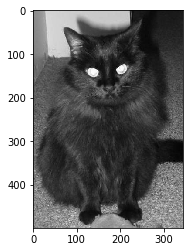

In [4]:
# For visualization

dir_path = "/home/parag/Transfer-Learning-in-keras---custom-data/data"  # current directory path

# you could use
#PATH = os.getcwd()
# data_path = PATH + '/data'
# data_dir_list = os.listdir(data_path)


CATEGORIES = ["cats", "dogs", "horses", "Humans"]    #4 categories

training_data = []          # empty list for training data for our model

img_size_setting = 224      # VGG require image size : 224*224*3           
               
for category in CATEGORIES:  # "cats", "dogs", "horses", "Humans"
    
    path = os.path.join(dir_path,category)
    for img in os.listdir(path):  # iterate over each image s
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  
        plt.show()  

        break  
    break 
    
    
    
   


In [5]:
#Creating training_data_list

dir_path = "/home/parag/Transfer-Learning-in-keras---custom-data/data"  # current directory path

# you could use
#PATH = os.getcwd()
# data_path = PATH + '/data'
# data_dir_list = os.listdir(data_path)


CATEGORIES = ["cats", "dogs", "horses", "Humans"]    #4 categories

training_data = []          # empty list for training data for our model

img_size_setting = 224      # VGG require image size : 224*224*3           
                
def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(dir_path,category)  
        class_num = CATEGORIES.index(category)  # Setting labels:0= cats, 1= dogs, 2= horses, 3= Humans
        for img in tqdm(os.listdir(path)):  # iterate over each image per category
            try:
                img_array = cv2.imread(os.path.join(path,img))  #image read  
                resize_array = cv2.resize(img_array, (img_size_setting, img_size_setting))  
                training_data.append([resize_array, class_num])
                
            except Exception as e:  
                pass

    
create_training_data()       
 

100%|██████████| 202/202 [00:00<00:00, 1081.09it/s]


In [6]:
#Preprocessing

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
  

X = np.array(X).reshape(-1, img_size_setting, img_size_setting, 3) # reshaping list to array

# We dont need to normalize X between 0 and 1. I think VGG original model did not do it.
# If we do normalization here, like X= X/255.0, validation accuracy decreases.

print("Label of Images:= \n", y)

print("---------------------------------")
print("Shape of Images:= \n", X.shape) 
print("---------------------------------")
print("First Image:= \n ",  X[0])

Label of Images:= 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [7]:
# Hot hot encoding of y (labels)

Y = np_utils.to_categorical(y, 4)

# shuffling is required to avoid any element of bias/patterns in the split datasets before training the ML model.
X,Y = shuffle(X,Y, random_state=2)

In [15]:
# Train_test-split using sklearn


from keras.layers import Flatten, Dense, Dropout

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


#Train_as_classifier 

image_input = Input(shape=(224, 224, 3))

model = ResNet50(input_tensor=image_input, include_top=True,weights='imagenet')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [16]:
#Changing classifier last layer as we have only 4 classes
# No. of parameters remains same

last_layer = model.get_layer('avg_pool').output
x= Flatten(name='flatten')(last_layer)
out = Dense(4, activation='softmax', name='output_layer')(x)
TL_resnet_model = Model(inputs=image_input,outputs= out)
TL_resnet_model.summary()



Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [17]:
# Freezing weights of Vgg model till fc2 layer(second last layer)
# No. of trainable parameters decreases and no. of non-trainable parameters increases

for layer in TL_resnet_model.layers[:-1]:
	layer.trainable = False
    
TL_resnet_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [25]:

# Model compliation and training with our dataset
# loss, optimizer function could be changed as per your choice

from keras.callbacks import TensorBoard

a= "Visual"

NAME = "{}-visual".format(a)
TL_resnet_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])



In [26]:
# As no. of custom dataset is very small, TL_resnet_model learns quite well or we could say model is over fit

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))  #A Keras callback function to visualize losses and accuracy during training 

TL_resnet_model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=1, validation_data=(X_test, y_test),callbacks=[tensorboard])


Train on 646 samples, validate on 162 samples
Epoch 1/15
128/646 [====>.........................] - ETA: 5s - loss: 0.0060 - accuracy: 1.0000

/home/parag/.conda/envs/tf/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.124931). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


646/646 [==============================] - 4s 6ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.0644 - val_accuracy: 0.9753
Epoch 2/15
646/646 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0573 - val_accuracy: 0.9877
Epoch 3/15
646/646 [==============================] - 2s 3ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0321 - val_accuracy: 0.9938
Epoch 4/15
646/646 [==============================] - 2s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0438 - val_accuracy: 0.9877
Epoch 5/15
646/646 [==============================] - 2s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 6/15
646/646 [==============================] - 2s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0717 - val_accuracy: 0.9691
Epoch 7/15
646/646 [==============================] - 2s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0239 - val_accuracy: 0.9938
Epoch 8/15
646/64

                                     ------------Training------------------
                                     
                                     Accuracy VS No. of epochs
                                     
  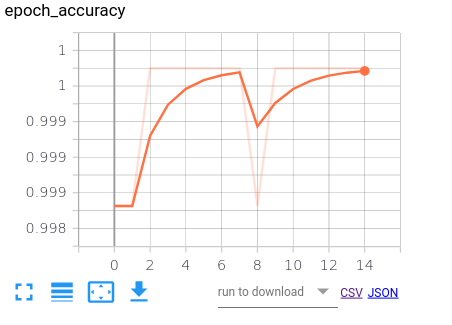

                                 ------------Training------------------

                                        Loss VS No. of epochs
  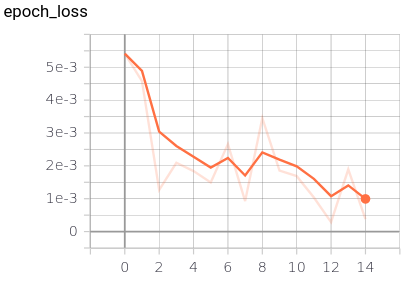

                             ------------Training------------------

                                    Validation accuracy VS No. of epochs
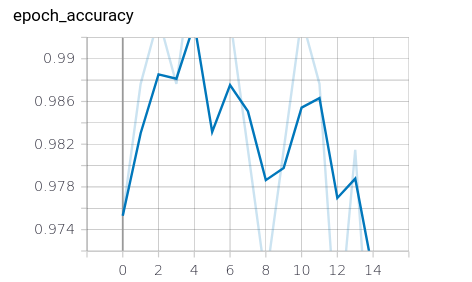

                         ------------Training------------------

                                Validation Loss VS No. of epochs
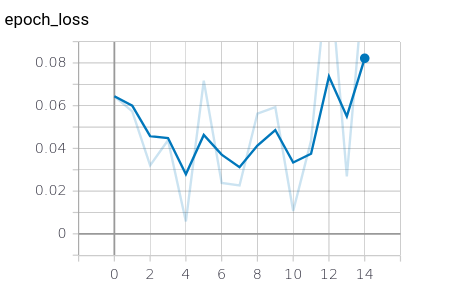

In [27]:
# Model performance on test samples from our dataset


(loss, accuracy) = TL_resnet_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


162/162 [==============================] - 1s 4ms/step
[INFO] loss=0.1230, accuracy: 95.6790%
